# Diabetes disease prediction using Naive Bayes classification

Diabetes is a chronic metabolic disorder that occurs when the body either doesn't produce enough insulin or cannot effectively use the insulin it produces. Insulin is a hormone responsible for regulating the level of glucose in the bloodstream and allowing it to enter cells to be used as energy. When insulin function is impaired, it leads to an accumulation of glucose in the blood, resulting in high blood sugar levels. Blood pressure and glucose levels are important factors in diagnosing diabetes:

<ol style="margin-left: 20px;">
    <li> Blood Pressure: Hypertension (high blood pressure) is often associated with diabetes. People with diabetes have an increased risk of developing hypertension due to various factors, including obesity, insulin resistance, and kidney problems.</li>
    <li> Glucose Levels: Testing blood glucose levels is a fundamental part of diagnosing diabetes. A fasting plasma glucose (FPG) test measures blood sugar after an overnight fast. If the fasting blood glucose level is consistently equal to or higher than 126 milligrams per deciliter (mg/dL) on two separate occasions, it indicates diabetes. Additionally, an oral glucose tolerance test (OGTT) can also be performed, where blood glucose levels are checked two hours after consuming a sugary drink. A result of 200 mg/dL or higher confirms diabetes.</li>
    
</ol>

**Objective**

The __objective__ of this study is to build and test a model that uses glucose and blood pressure data to **predict** whether a pacient has **diabetes (0)** or **not (1)**. In machine learning this is a classification problem and it could helps us to identify possible diabetes cases in pacients.

## Data source:

The diabetes dataset was provided by HIMANSHU NAKRANI in Kaggle. The dataset contains 3 columns and 995 entries. Each column contains values for blood pressure, glucose and diabetes respectively.

## Load libraries:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

## Load data:

In [3]:
diabetes_df = pd.read_csv('diabetes_data.csv')

# EDA:

The exploratory data analysis will help us understanding our data.

## 1- Data inspection:

In [4]:
# First 10 rows from diabetes_df

diabetes_df.head(10)

,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [5]:
# Check how many colums and rows of data there are in total

diabetes_df.shape

(995, 3)

In [6]:
# Check the total elements in our data

diabetes_df.size

2985

In [7]:
# Getting more information about the data, including data types

diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   glucose        995 non-null    int64
 1   bloodpressure  995 non-null    int64
 2   diabetes       995 non-null    int64
dtypes: int64(3)
memory usage: 23.4 KB


In [8]:
# Getting descriptive statistics of the dataframe

diabetes_df.describe()

,glucose,bloodpressure,diabetes
count,995.000000,995.000000,995.000000
mean,44.306533,79.184925,0.500503
std,6.707567,9.340204,0.500251
min,20.000000,50.000000,0.000000
25%,40.000000,72.000000,0.000000
50%,45.000000,80.000000,1.000000
75%,50.000000,87.000000,1.000000
max,70.000000,100.000000,1.000000


## 2- Data cleaning:

In [9]:
# Checking for null values

diabetes_df.isna().sum()

glucose          0
bloodpressure    0
diabetes         0
dtype: int64

## 3- Data visualization:

Lets check if our predictor variables present any correlation.

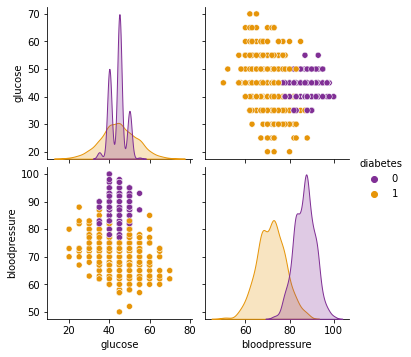

In [10]:
# Scatter plots

sns.pairplot(data = diabetes_df, hue = "diabetes", palette = "CMRmap")

<AxesSubplot:xlabel='diabetes', ylabel='count'>

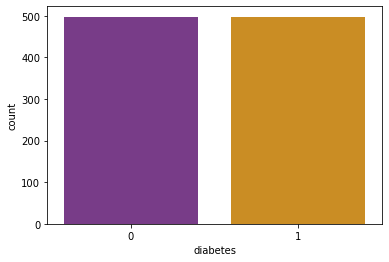

In [11]:
# Visualizing the distribution of classes in the variable target

sns.countplot(x = diabetes_df['diabetes'], label = 'Count', palette = 'CMRmap')

In [12]:
diabetes_df['diabetes'].value_counts()

1    498
0    497
Name: diabetes, dtype: int64

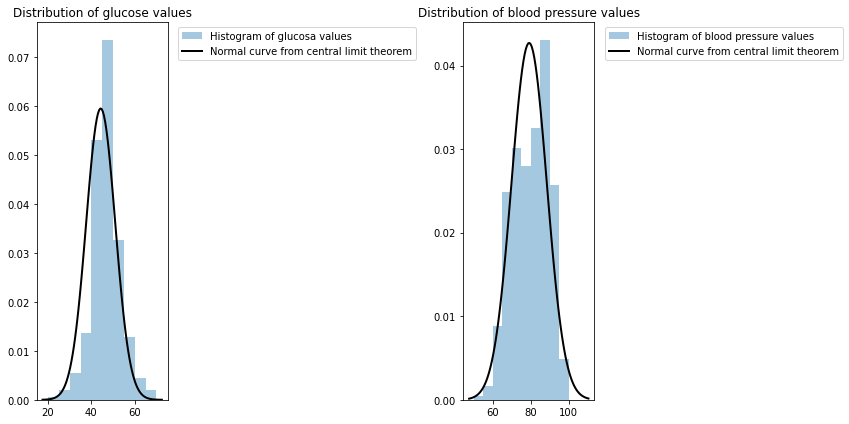

In [13]:
# Distribution of the predictor variables

# Set up the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


# Glucosa figure
axes[0].hist(diabetes_df['glucose'], bins=10, density=True, alpha=0.4, label = "Histogram of glucosa values")
axes[0].set_title('Distribution of glucose values')

xmin_0, xmax_0 = axes[0].get_xlim()
x_0 = np.linspace(xmin_0, xmax_0, 100)
p_0 = stats.norm.pdf(x_0, round(diabetes_df['glucose'].mean(), 3), stats.tstd(diabetes_df['glucose']))

axes[0].plot(x_0, p_0,'k', linewidth=2, label = 'Normal curve from central limit theorem')
axes[0].legend(bbox_to_anchor=(1.04,1))


# Blood pressure figure
axes[1].hist(diabetes_df['bloodpressure'], bins=10, density=True, alpha=0.4, label = "Histogram of blood pressure values")
axes[1].set_title('Distribution of blood pressure values')

xmin_1, xmax_1 = axes[1].get_xlim()
x_1 = np.linspace(xmin_1, xmax_1+8, 100)
p_1 = stats.norm.pdf(x_1, round(diabetes_df['bloodpressure'].mean(), 3), stats.tstd(diabetes_df['bloodpressure']))

axes[1].plot(x_1, p_1,'k', linewidth=2, label = 'Normal curve from central limit theorem')
axes[1].legend(bbox_to_anchor=(1.04,1))


plt.tight_layout()
plt.show()

# Model preparation:

## 1- Isolate the target and predictor variables

Separately, we define the target variable (diabetes) and the features (glucose and bloodpressure).

In [14]:
# The y (target) variable

y = diabetes_df['diabetes']

# The X (predictor) variables

X = diabetes_df.drop(['diabetes'], axis=1)

print(y.shape)
print(X.shape)
print(y.value_counts())

(995,)
(995, 2)
1    498
0    497
Name: diabetes, dtype: int64


## 2- Checking the class balance

In [52]:
# Checking the class balance

def class_balance(a):
    counts = a.value_counts()
    percent_1 = round(counts[1] * 100 /counts.sum(), 2)
    percent_0 = round(counts[0] * 100 /counts.sum(),2)
    
    return print('diabetes_percentage =', percent_0, '%', '\n',
                 'no_diabetes_percentage =' , percent_1, '%')

class_balance(diabetes_df['diabetes'])

diabetes_percentage = 49.95 % 
 no_diabetes_percentage = 50.05 %


## 3- Split data into Training and Test sets
Lets divide the data into a training set (70% of data) and test set (30% of data). This is an important step in the process, as it allows to reserve a part of the data that the model has not observed. This tests how well the model performs on new data.

In [16]:
# Split operation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 42)

In [17]:
# Shape of each output


print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(696, 2)
(696,)
(299, 2)
(299,)


# Model building:

## 1- Gaussian Naive Bayes

We saw that our predictor variables follow approximately a normal distribution, therefore we can use the assumption that our features are normally distributed and continuous, so the Gaussian Naive Bayes algorithm is appropriated for our data.

In [18]:
nb = GaussianNB()

# Fitting the model on the training data.
nb.fit(X_train, y_train)

# Applying our model to predict on the test data.
y_pred_nb = nb.predict(X_test)

## 2- Logistic Regression

In [19]:
lreg = LogisticRegression()

# Fitting the model on the training data.
lreg.fit(X_train, y_train)

# Applying our model to predict on the test data.
y_pred_lreg = lreg.predict(X_test)

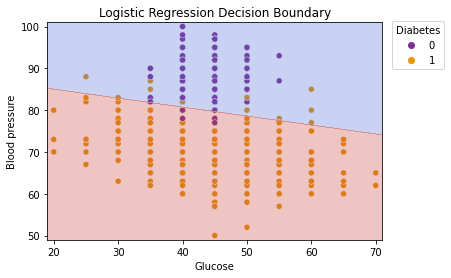

In [37]:
X_0 = diabetes_df[['glucose', 'bloodpressure']].values
y_0 = diabetes_df['diabetes'].values


# Create a scatter plot for the data points
sns.scatterplot(x='glucose', y='bloodpressure', hue='diabetes', data=diabetes_df, palette='CMRmap', marker='o')

# Create a meshgrid to generate points for contour plot
x_min, x_max = X_0[:, 0].min() - 1, X_0[:, 0].max() + 1
y_min, y_max = X_0[:, 1].min() - 1, X_0[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for the meshgrid points
Z = lreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Overlay the decision boundary as a contour plot
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')

plt.xlabel('Glucose')
plt.ylabel('Blood pressure')
plt.title('Logistic Regression Decision Boundary')
plt.legend(title='Diabetes',bbox_to_anchor=(1.2,1.03))
plt.show()

# Results and evaluation:

## 1- Confusion Matrix and Leverage metrics for Gaussian Naive Bayes

              precision    recall  f1-score   support

    Diabetes       0.93      0.93      0.93       140
     Healthy       0.94      0.94      0.94       159

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



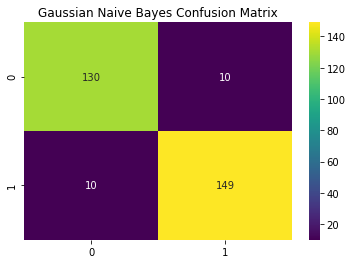

In [47]:
cm = confusion_matrix(y_test, y_pred_nb)
sns.heatmap(cm, annot=True, cmap = 'viridis', fmt='d')
plt.title('Gaussian Naive Bayes Confusion Matrix')

target_labels = [ 'Diabetes', 'Healthy']
print(classification_report(y_test, y_pred_nb, target_names=target_labels))

## 2- Confusion Matrix and Leverage metrics for Logistic Regression

              precision    recall  f1-score   support

    Diabetes       0.90      0.94      0.92       140
     Healthy       0.95      0.91      0.93       159

    accuracy                           0.93       299
   macro avg       0.93      0.93      0.93       299
weighted avg       0.93      0.93      0.93       299



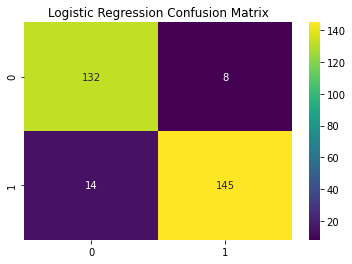

In [51]:
cm = confusion_matrix(y_test, y_pred_lreg)
sns.heatmap(cm, annot=True, cmap = 'viridis', fmt='d')
plt.title('Logistic Regression Confusion Matrix')

target_labels = [ 'Diabetes', 'Healthy']
print(classification_report(y_test, y_pred_lreg, target_names=target_labels))

# Observation:

There are two possible predicted classes: '0' indicates a pacient has diabetes, and '1' indicates a pacient has not diabetes.

Of the two models built, we obtain the following results:

<ol style="margin-left: 20px;">
    <li> Naive Bayes Model: It achieves a precision of 94% and a recall of 94%, resulting in an accuracy of 93%.</li>
    <li> Logistic Regression Model: It achieves a precision of 95% and a recall of 91%, resulting in an accuracy of 93%.</li>
    
</ol>

In the present case, it is preferable to have the fewest false negatives. False negatives would represent patients who would not receive treatment for diabetes because they were incorrectly classified as healthy patients. Therefore, the model that best suits our predictive needs is the logistic regression model.